# EREBUS-11  - BME Suborbitals Rocket Team 

Launched at EUROC'22 with the target apogee of 3000 meters. The rocket,achieved the apogee with extreme precision, but it had a ballistic trajectory.
Permission to use flight data given by Tomi via discord, 2024.

These results were extracted out of the flight card:

1. Team number: `7`
2. Launch window: `October 15th, 2022, 16h local time`
3. Simulated apogee: `2750.90 m` 
4. Official recorded apogee: `3020 m`

The error of the simulated apogee is only `8.91%`.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from rocketpy import Function, Environment, Flight, Rocket, SolidMotor
from rocketpy.motors import CylindricalTank, SolidMotor
from rocketpy.motors.tank import MassFlowRateBasedTank

import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-colorblind")

## Environment


Gravity Details

Acceleration of gravity at surface level:    9.8066 m/s²
Acceleration of gravity at   4.000 km (ASL): 9.8066 m/s²


Launch Site Details

Launch Date: 2022-10-15 15:00:00 UTC | 2022-10-15 16:00:00 Portugal
Launch Site Latitude: 39.38970°
Launch Site Longitude: -8.28896°
Reference Datum: WGS84
Launch Site UTM coordinates: 44415.44 W    4373388.30 N
Launch Site UTM zone: 30S
Launch Site Surface Elevation: 160.0 m


Atmospheric Model Details

Atmospheric Model Type: Reanalysis
Reanalysis Maximum Height: 4.000 km
Reanalysis Time Period: from 2022-10-13 10:00:00 to 2022-10-17 17:00:00 utc
Reanalysis Hour Interval: 2 hrs
Reanalysis Latitude Range: From 40.0° to 39.0°
Reanalysis Longitude Range: From -9.0° to -8.0°

Surface Atmospheric Conditions

Surface Wind Speed: 3.46 m/s
Surface Wind Direction: 276.74°
Surface Wind Heading: 96.74°
Surface Pressure: 995.69 hPa
Surface Temperature: 296.12 K
Surface Air Density: 1.171 kg/m³
Surface Speed of Sound: 344.97 m/s


Earth Model D

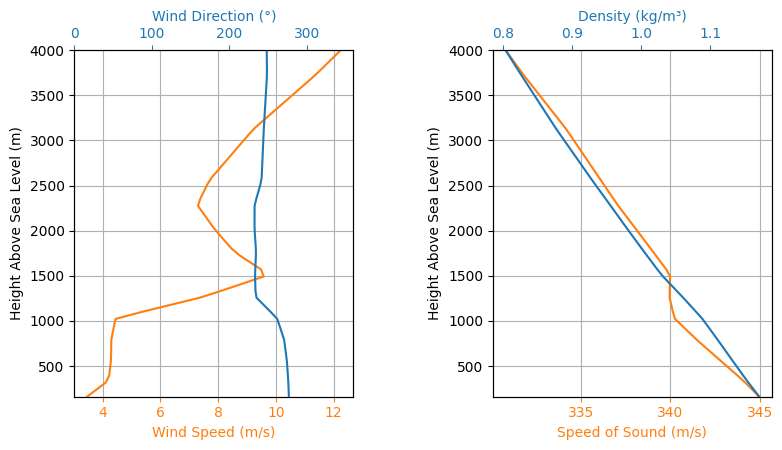

In [166]:
env = Environment(
    gravity=9.80665,
    date=(2022, 10, 15, 16),
    latitude=39.3897,
    longitude=-8.2889639,
    elevation=160,
    datum="WGS84",
    timezone="Portugal",
)

env.set_atmospheric_model(
    type="Reanalysis",
    file="../../data/weather/euroc_2022_all_windows.nc",
    dictionary="ECMWF",
)
env.max_expected_height = 4000
env.info()

## Motor

The rocket was equiped with a Cesaroni Motor Pro54, class K.

In [167]:
ProK54 = SolidMotor(
    dry_mass=0,
    thrust_source="../../data/rockets/erebus11/thrust_source.csv",
    burn_time=3.657,
    grain_number=1,
    grain_density=1196.6353410211093,
    grain_initial_inner_radius=0.0135,
    grain_outer_radius=0.027,
    grain_initial_height=0.572,
    grain_separation=0,
    grains_center_of_mass_position=0.3,
    dry_inertia=(0, 0, 0),
    center_of_dry_mass_position=0,
    nozzle_radius=0.02025,
    nozzle_position=0,
    throat_radius= 0.0135,
    coordinate_system_orientation="nozzle_to_combustion_chamber"
)

Nozzle Details
Nozzle Radius: 0.02025 m
Nozzle Throat Radius: 0.0135 m

Grain Details
Number of Grains: 1
Grain Spacing: 0 m
Grain Density: 1196.6353410211093 kg/m3
Grain Outer Radius: 0.027 m
Grain Inner Radius: 0.0135 m
Grain Height: 0.572 m
Grain Volume: 0.001 m3
Grain Mass: 1.176 kg

Motor Details
Total Burning Time: 3.657 s
Total Propellant Mass: 1.176 kg
Structural Mass Ratio: 0.000
Average Propellant Exhaust Velocity: 2056.827 m/s
Average Thrust: 661.255 N
Maximum Thrust: 1076.6 N at 0.07 s after ignition.
Total Impulse: 2418.211 Ns



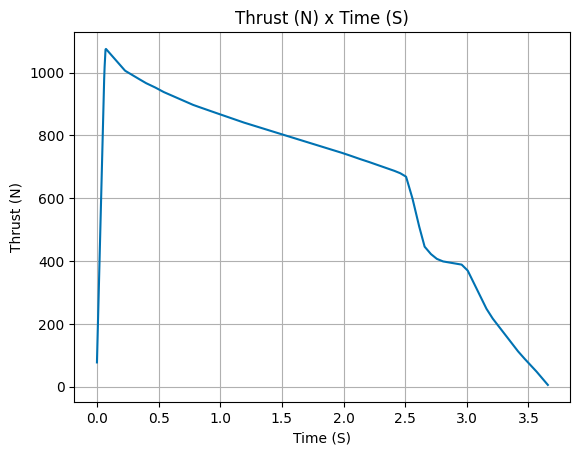

In [168]:
ProK54.info()

## Rocket and Aerodynamic surfaces

For comparison purposes, no parachute will be added to the simulation

In [169]:
EREBUS11 = Rocket(
    radius=0.04575,
    mass=5.82,
    inertia=(2.571, 2.571, 0.0056233),
    center_of_mass_without_motor=1.192,
    power_off_drag="../../data/rockets/erebus11/drag_curve.csv",
    power_on_drag="../../data/rockets/erebus11/drag_curve.csv",
    coordinate_system_orientation="tail_to_nose",
)

EREBUS11.set_rail_buttons(1.392, 0.692)

EREBUS11.add_motor(ProK54, position=0.211668)

In [170]:
NoseCone = EREBUS11.add_nose(
    length=0.391113,
    kind="vonKarman",
    position= 2.3841
)

FinSet = EREBUS11.add_trapezoidal_fins(
    n=4,
    span=0.08,
    root_chord=0.12,
    tip_chord=0.05,
    position=0.395787,
)

Tail = EREBUS11.add_tail(
    bottom_radius=0.03575,
    length= 0.079119,
    position=0.290787,
    top_radius= 0.04575
)

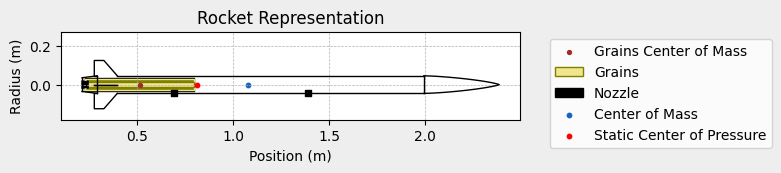

In [171]:
EREBUS11.draw()

# Flight Simulation DATA

In [172]:
test_flight = Flight(
    rocket=EREBUS11, environment=env, inclination=84, heading=133, rail_length=12
)


Apogee State

Apogee Time: 22.171 s
Apogee Altitude: 2910.904 m (ASL) | 2750.904 m (AGL)
Apogee Freestream Speed: 13.742 m/s
Apogee X position: 227.191 m
Apogee Y position: -301.365 m
Apogee latitude: 39.3869891°
Apogee longitude: -8.2863197°


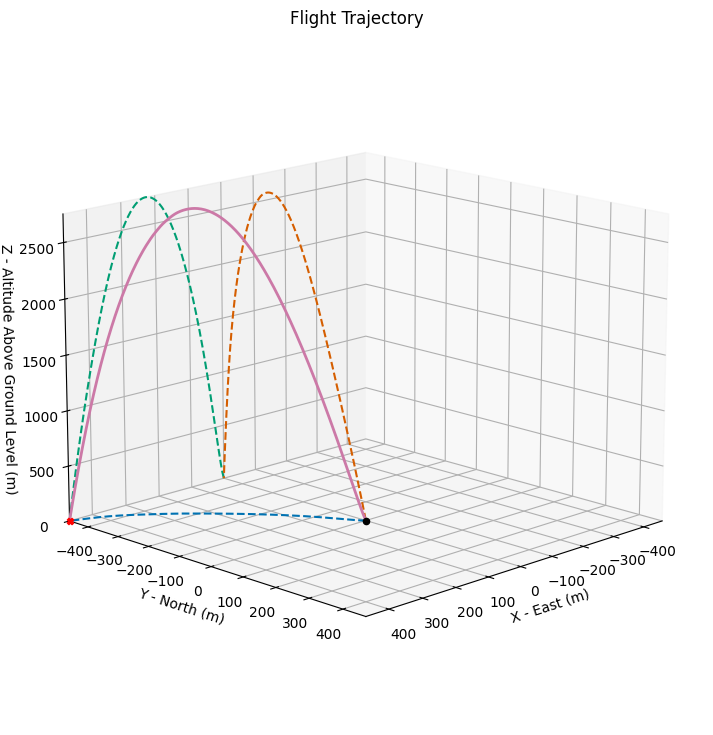

In [173]:
test_flight.prints.apogee_conditions()
test_flight.plots.trajectory_3d()

# Data analysis

In [20]:
from rocketpy.simulation.flight_data_importer import FlightDataImporter


columns_map = {
    "T": "time",
    "altitude[m]": "altitude",
    "velocity[m/s]": "vz",
}

cots_altimeter_flight = FlightDataImporter(
    name="COTS Altimeter Flight",
    paths="../../data/polito/altimeter_cavour.csv",
    columns_map=columns_map,
    units=None,
    interpolation="linear",
    extrapolation="zero",
    delimiter=",",
    encoding="utf-8",
)

The following attributes were create and are now available to be used:  ['time', 'altitude', 'vz']


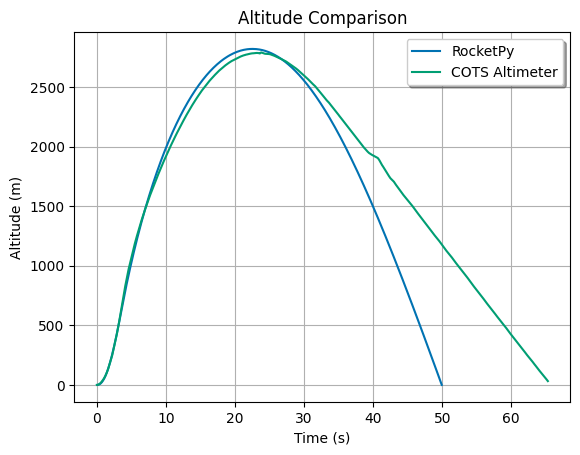

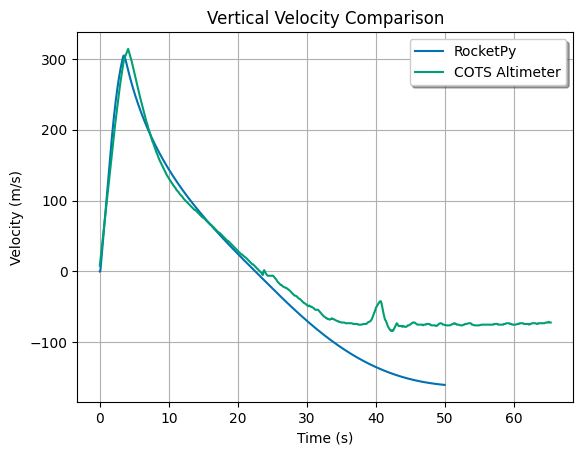

In [22]:
Function.compare_plots(
    [
        (test_flight.altitude, "RocketPy"),
        (cots_altimeter_flight.altitude, "COTS Altimeter"),
    ],
    title="Altitude Comparison",
    xlabel="Time (s)",
    ylabel="Altitude (m)",
)

Function.compare_plots(
    [
        (test_flight.vz, "RocketPy"),
        (cots_altimeter_flight.vz, "COTS Altimeter"),
    ],
    title="Vertical Velocity Comparison",
    xlabel="Time (s)",
    ylabel="Velocity (m/s)",
)